# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data

---

## 1.) Import packages

In [197]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
sns.set(style="darkgrid",font_scale=1.5)
plt.style.use('seaborn-v0_8-darkgrid')


---
## 2.) Loading data with Pandas

In [199]:
df=pd.read_csv('../data/processed_data/customer_churn_data.csv')

### 2.1 Check Missing values again

In [200]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


### 2.2 Checking the Dimensions of Dataset.

In [201]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 11


### 2.3  Fetching the Attributes Names.

In [202]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churned'],
      dtype='object')

---

## 3.) Descriptive statistics of data

### Data types

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churned          10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


### Statistics

In [204]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


---
# Data Visualization
---
## 1.) Visualizing Target Variable.

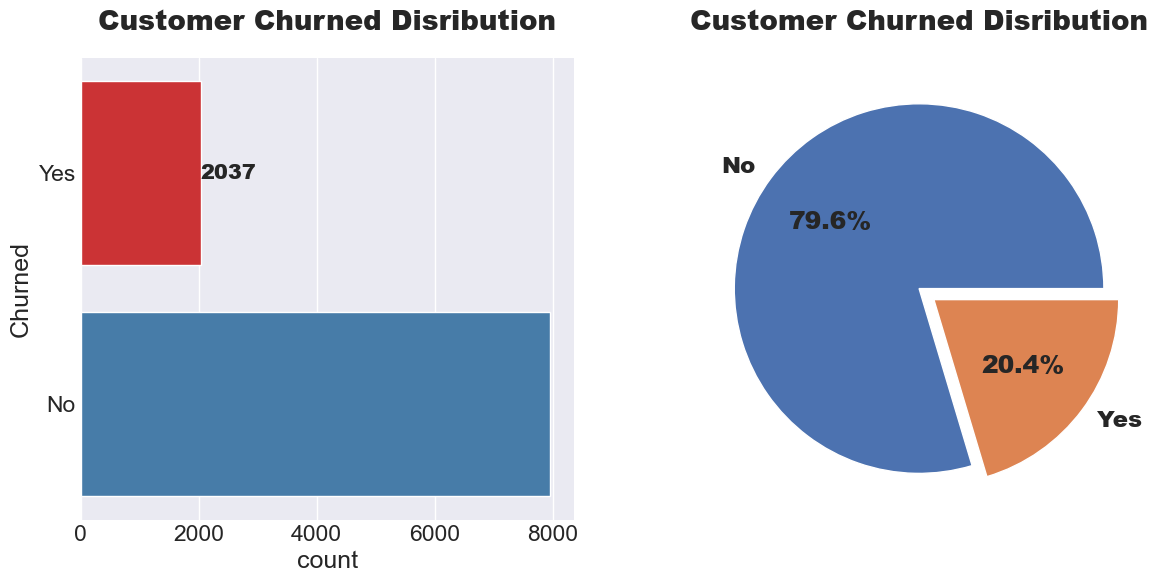

In [205]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set1")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

### insight
- There is huge class-imbalance which can lead to bias in model performance.

- So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

---
## 2. Visualizing Customer Churned by Gender.

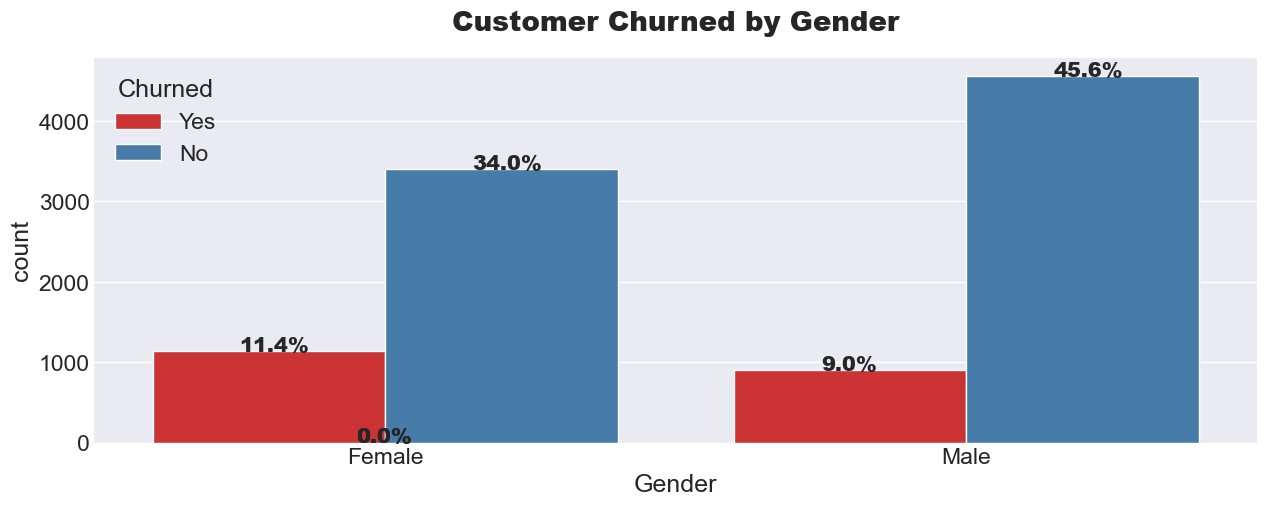

In [206]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set1")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()
    
countplot("Gender")

Insight:
- The churned probabillity is more for Feamle Customers compared to male customers.
- Which means female customers are more deactivating their banking facilities compared to male customers.

---
## 3. Visualizing Customer Churned by Geoprahical Region.

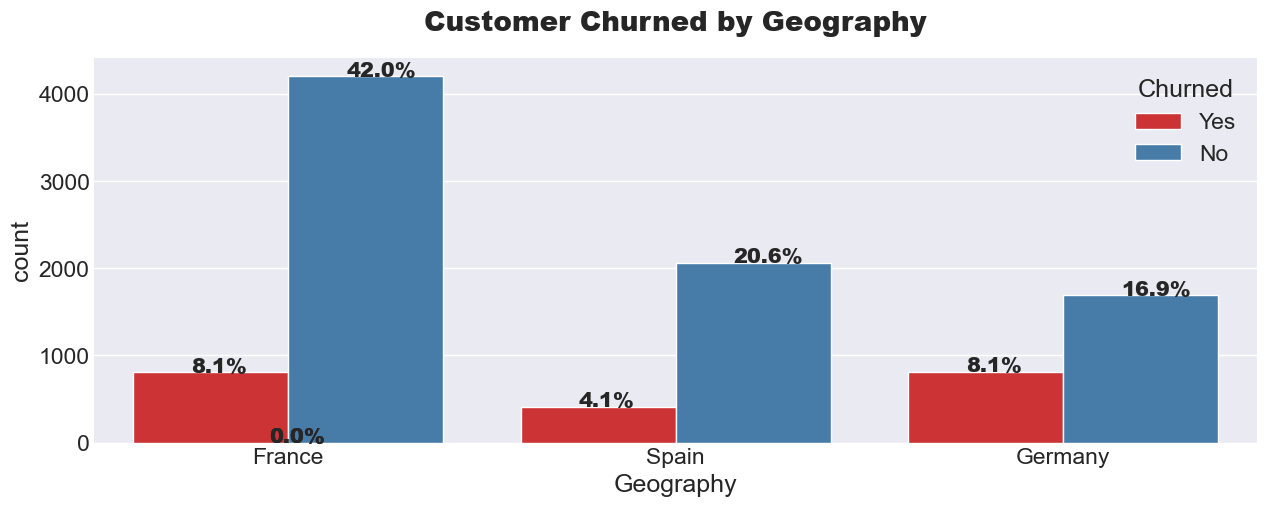

In [207]:
countplot("Geography")

 Insight:
- Half of the customers are from France followed by Germany and Spain.
- Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.
- There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.

---
## 4.  Visualizing Customer Churn by "HasCrCard".

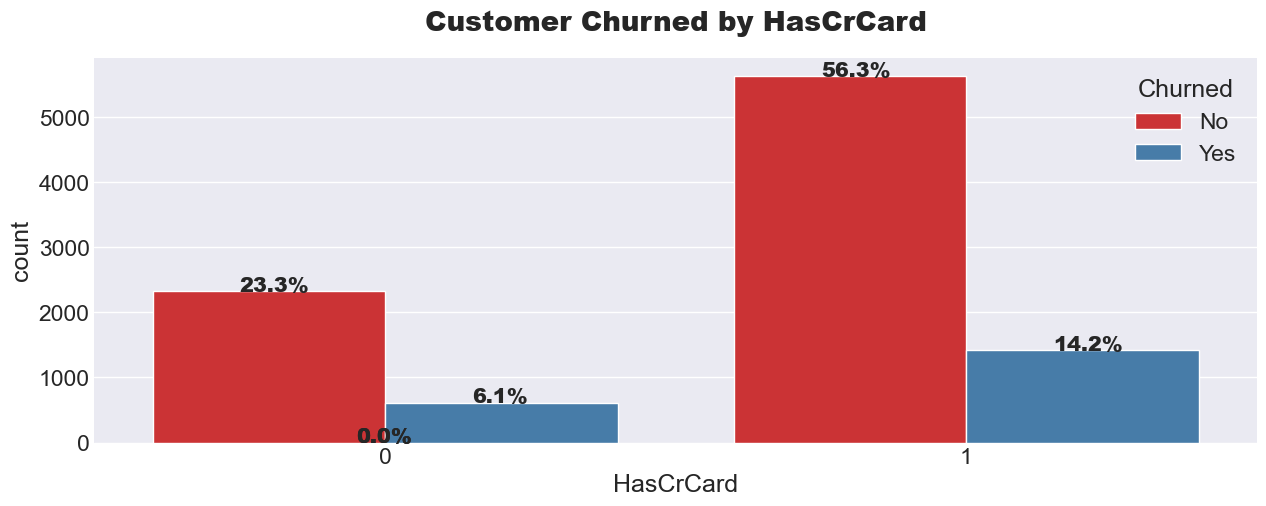

In [208]:
countplot("HasCrCard")

 Insight:
- More than 70% of customers are having credit card.
- The churn probability value for the both the categories is almost 1:4.
- So credit card is not affecting the churn of customers.

---
## 5. Visualizing Customer Churned by "NumOfProducts"

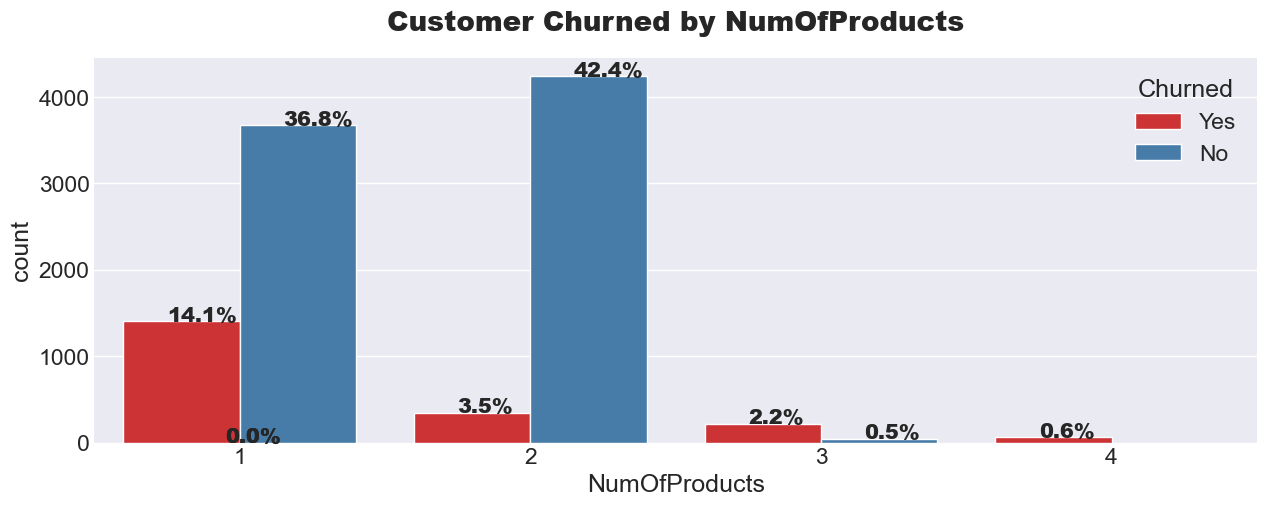

In [209]:
countplot("NumOfProducts")

 Insight:
- Most of the customers are having either 1 or 2 total number of banking products.
- Very few customers are having more than 2 total number of banking products.
- The lowest churn rate is with customers having only 2 products.
- There is very high churn rate in customers having 1 product or more than 2 products.

---
## 6. Visualizing Customer Churned by "IsActiveMember".

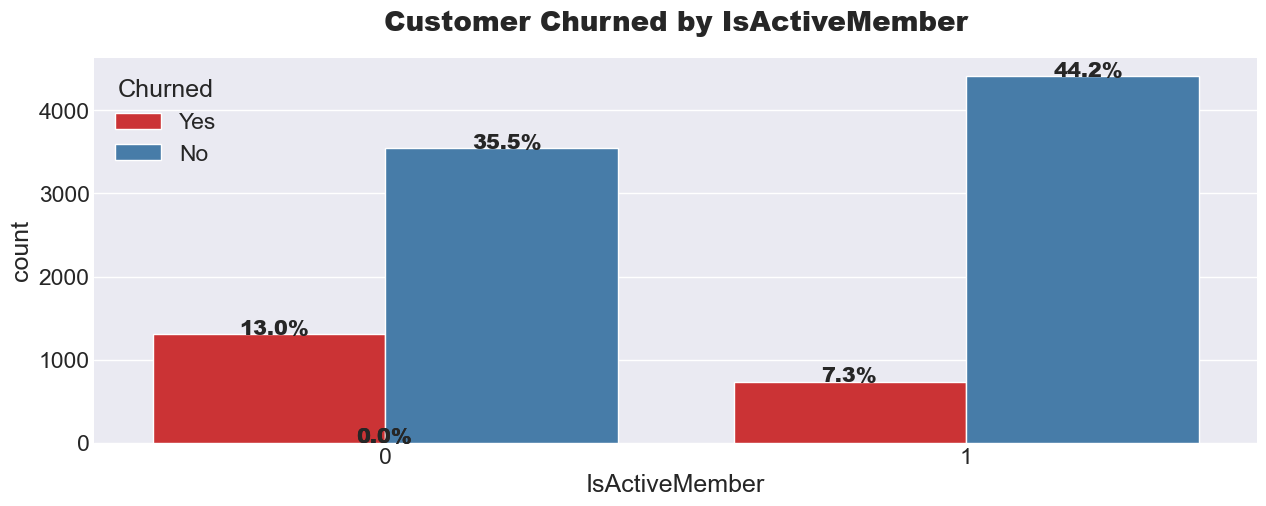

In [210]:
countplot("IsActiveMember")

Insight:
- There is approxiamately equal customer who are either active or not active.
- But the churn rate % in not active customers is almost double compared to active customers.
- So customers which are not active are morely likely to deactivate their banking facilities.

---
## 7. Visualizing Customer Churned by "Tenure".

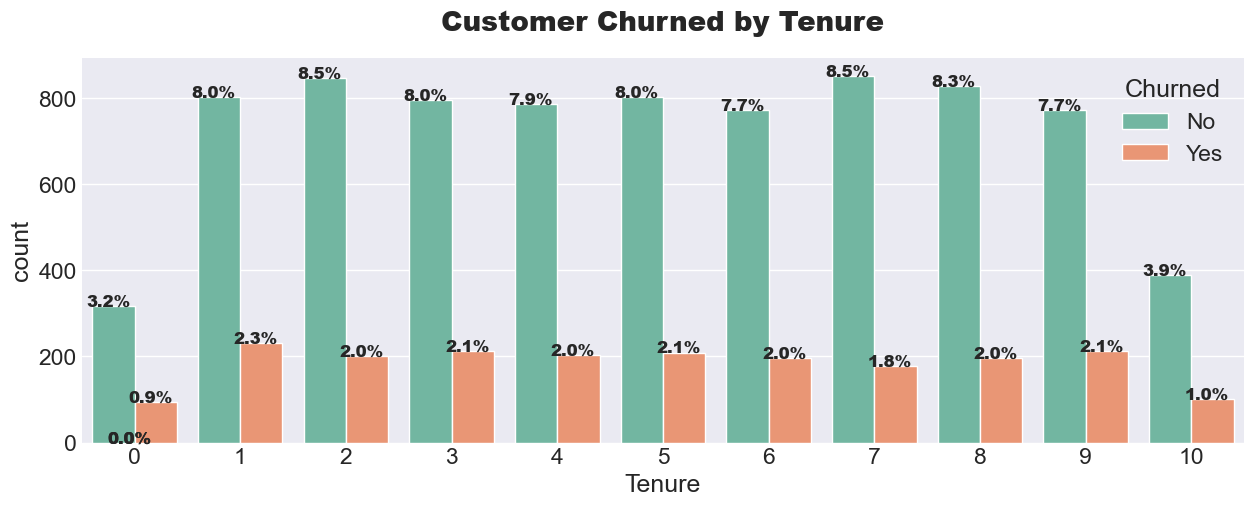

In [211]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

Insight:
- The highest tenure is 10 years which means that those customers have opened their account 10 years back.
- Since there is almost similar distribution of churn status we can't make any specific inference.

---
## 8. Visualizing Customer Churned by "CreditScore".

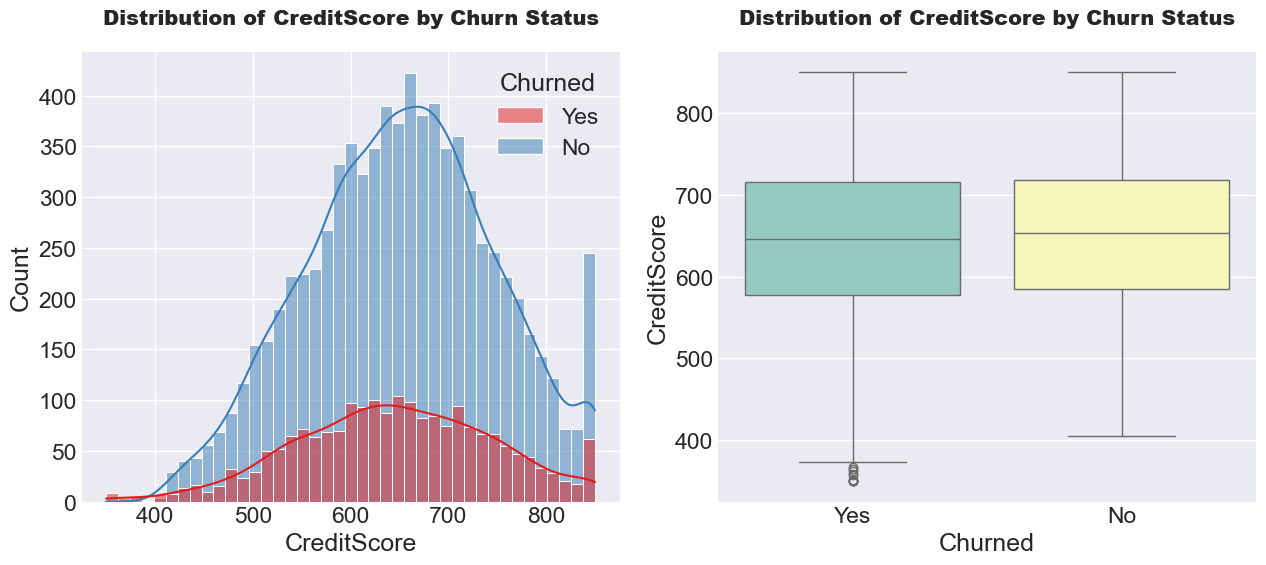

In [212]:
def continuous_plot(column, data):
    fig, axs = plt.subplots(1, 2, figsize=(13, 6))

    sns.histplot(
        x=column,
        hue="Churned",
        data=data,
        kde=True,
        palette="Set1",
        ax=axs[0]
    )
    axs[0].set_title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    sns.boxplot(
        x="Churned",
        y=column,
        data=data,
        palette="Set3",
        ax=axs[1]
    )
    axs[1].set_title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    fig.tight_layout()

    plt.show()

continuous_plot("CreditScore", df)

Insight:
- The Median CreditScore of both churned and not churned customers are approxiamately equal.
- Since the values are approximately equal for both churn status we can't generate any relevant inference.

---
## 9. Visualizing Customer Churned by "Age".

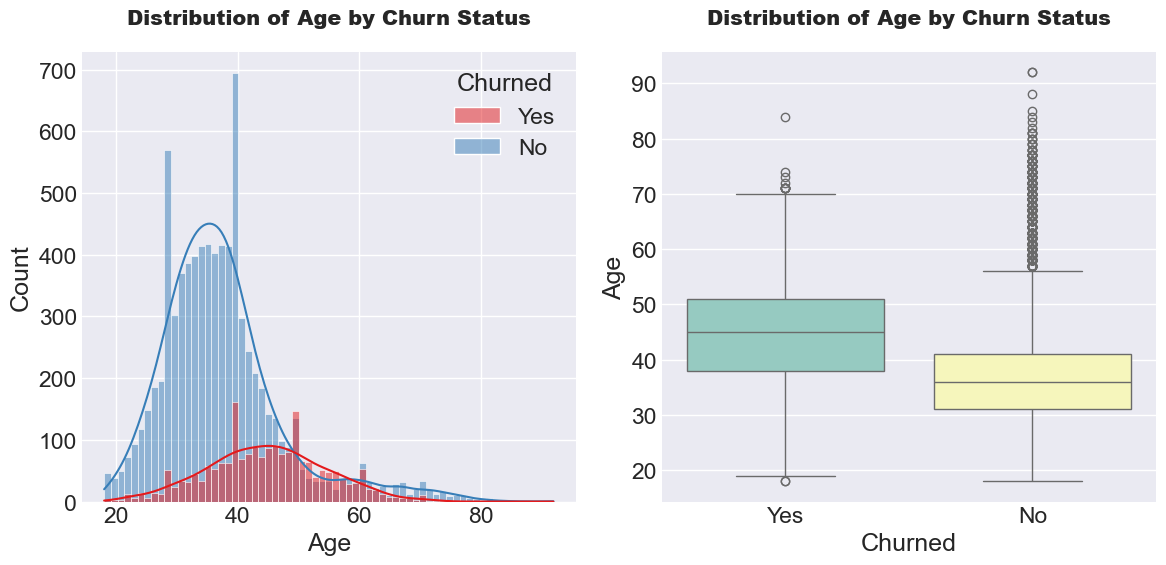

In [213]:
def continous_plot(column):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, hue="Churned", kde=True, palette="Set1")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set3")  # Corrected usage
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
    
    plt.tight_layout()
    plt.show()

continous_plot("Age")

Insight:
- The distribution is right skewed because of presence of outliers which can lead to overfitting in model.
- To overcome this right-skewed distribution we can use log normal transformation technique to bring a normal distribution.

---
## 10. Visualizing Customer Churned by "Balance."

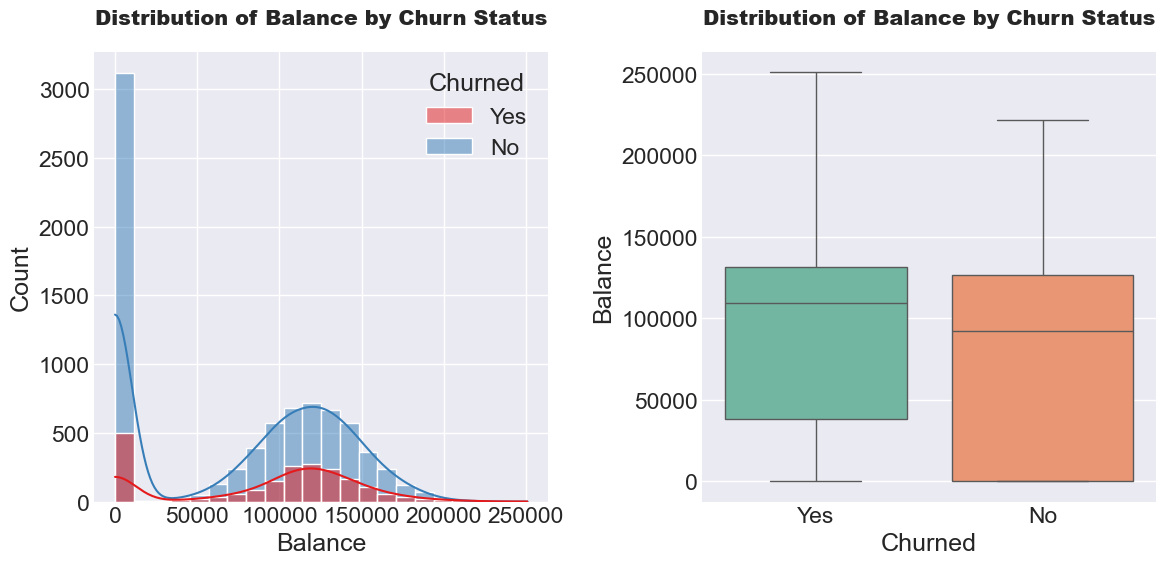

In [214]:
def continuous_plot(column):
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=column, hue="Churned", kde=True, palette="Set1")
        plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x="Churned", y=column, palette="Set2")
        plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
        plt.tight_layout()
        plt.show()
        
continuous_plot("Balance")

Insight:
- More than 3000 customers are having their account balance equal to zero.
- Customers with zero balance are more likely to deactivate their account.
- Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.

---
## 11. Visualizing Customer Churned by "Estimated Salary".

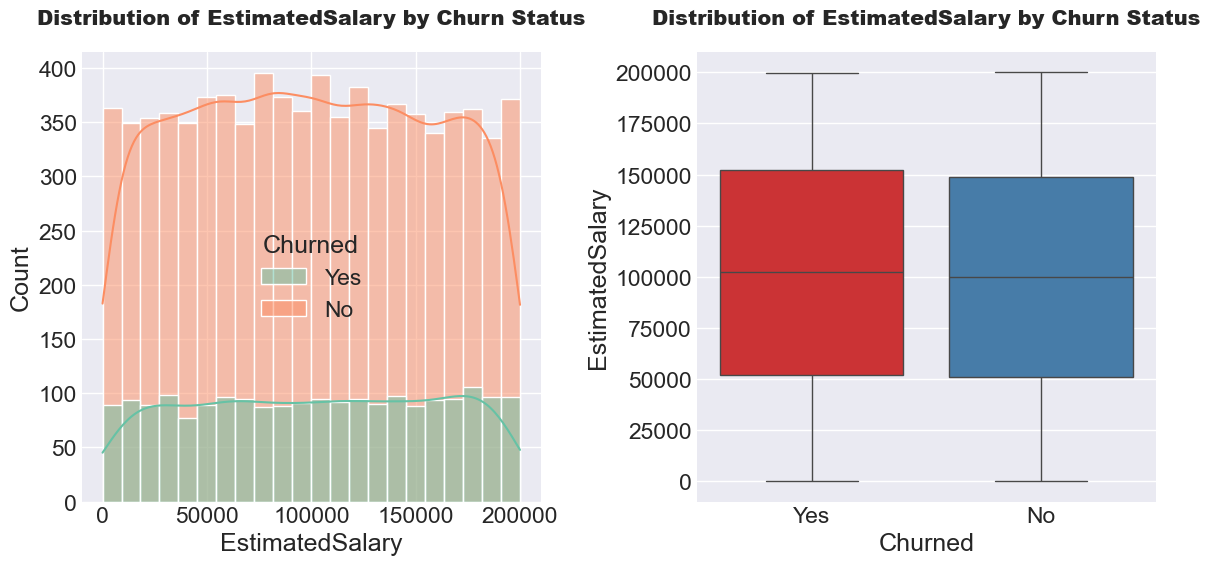

In [215]:
def continuous_plot(column):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=column, hue="Churned", kde=True, palette="Set2")
        plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x="Churned", y=column, palette="Set1")  # Corrected syntax
        plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
        plt.tight_layout()
        plt.show()

continuous_plot("EstimatedSalary")

Insight:
- The median value of EstimatedSalary is approxiamately same for both the churned categories.
- Since the distribution is kind of similar for both churn category we can't make any relevant inference.

---